
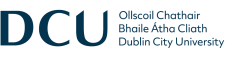

# **Spring 2025 BAA1030 Data Analytics & Storytelling (20074)**

Student Name: Schenit Paul
DCU Student Number: A00011923

Programme: MSc in Management:


# **Iodized Salt: A Global Lifesaver**

But Gaps Remain Iodine deficiency is the world’s leading cause of preventable brain damage in children. Thanks to decades of global action, most countries have made huge progress in providing iodized salt to households. But as this map shows, there are still regions where millions of families remain unprotected, putting children at risk of developmental delays and lifelong challenges.

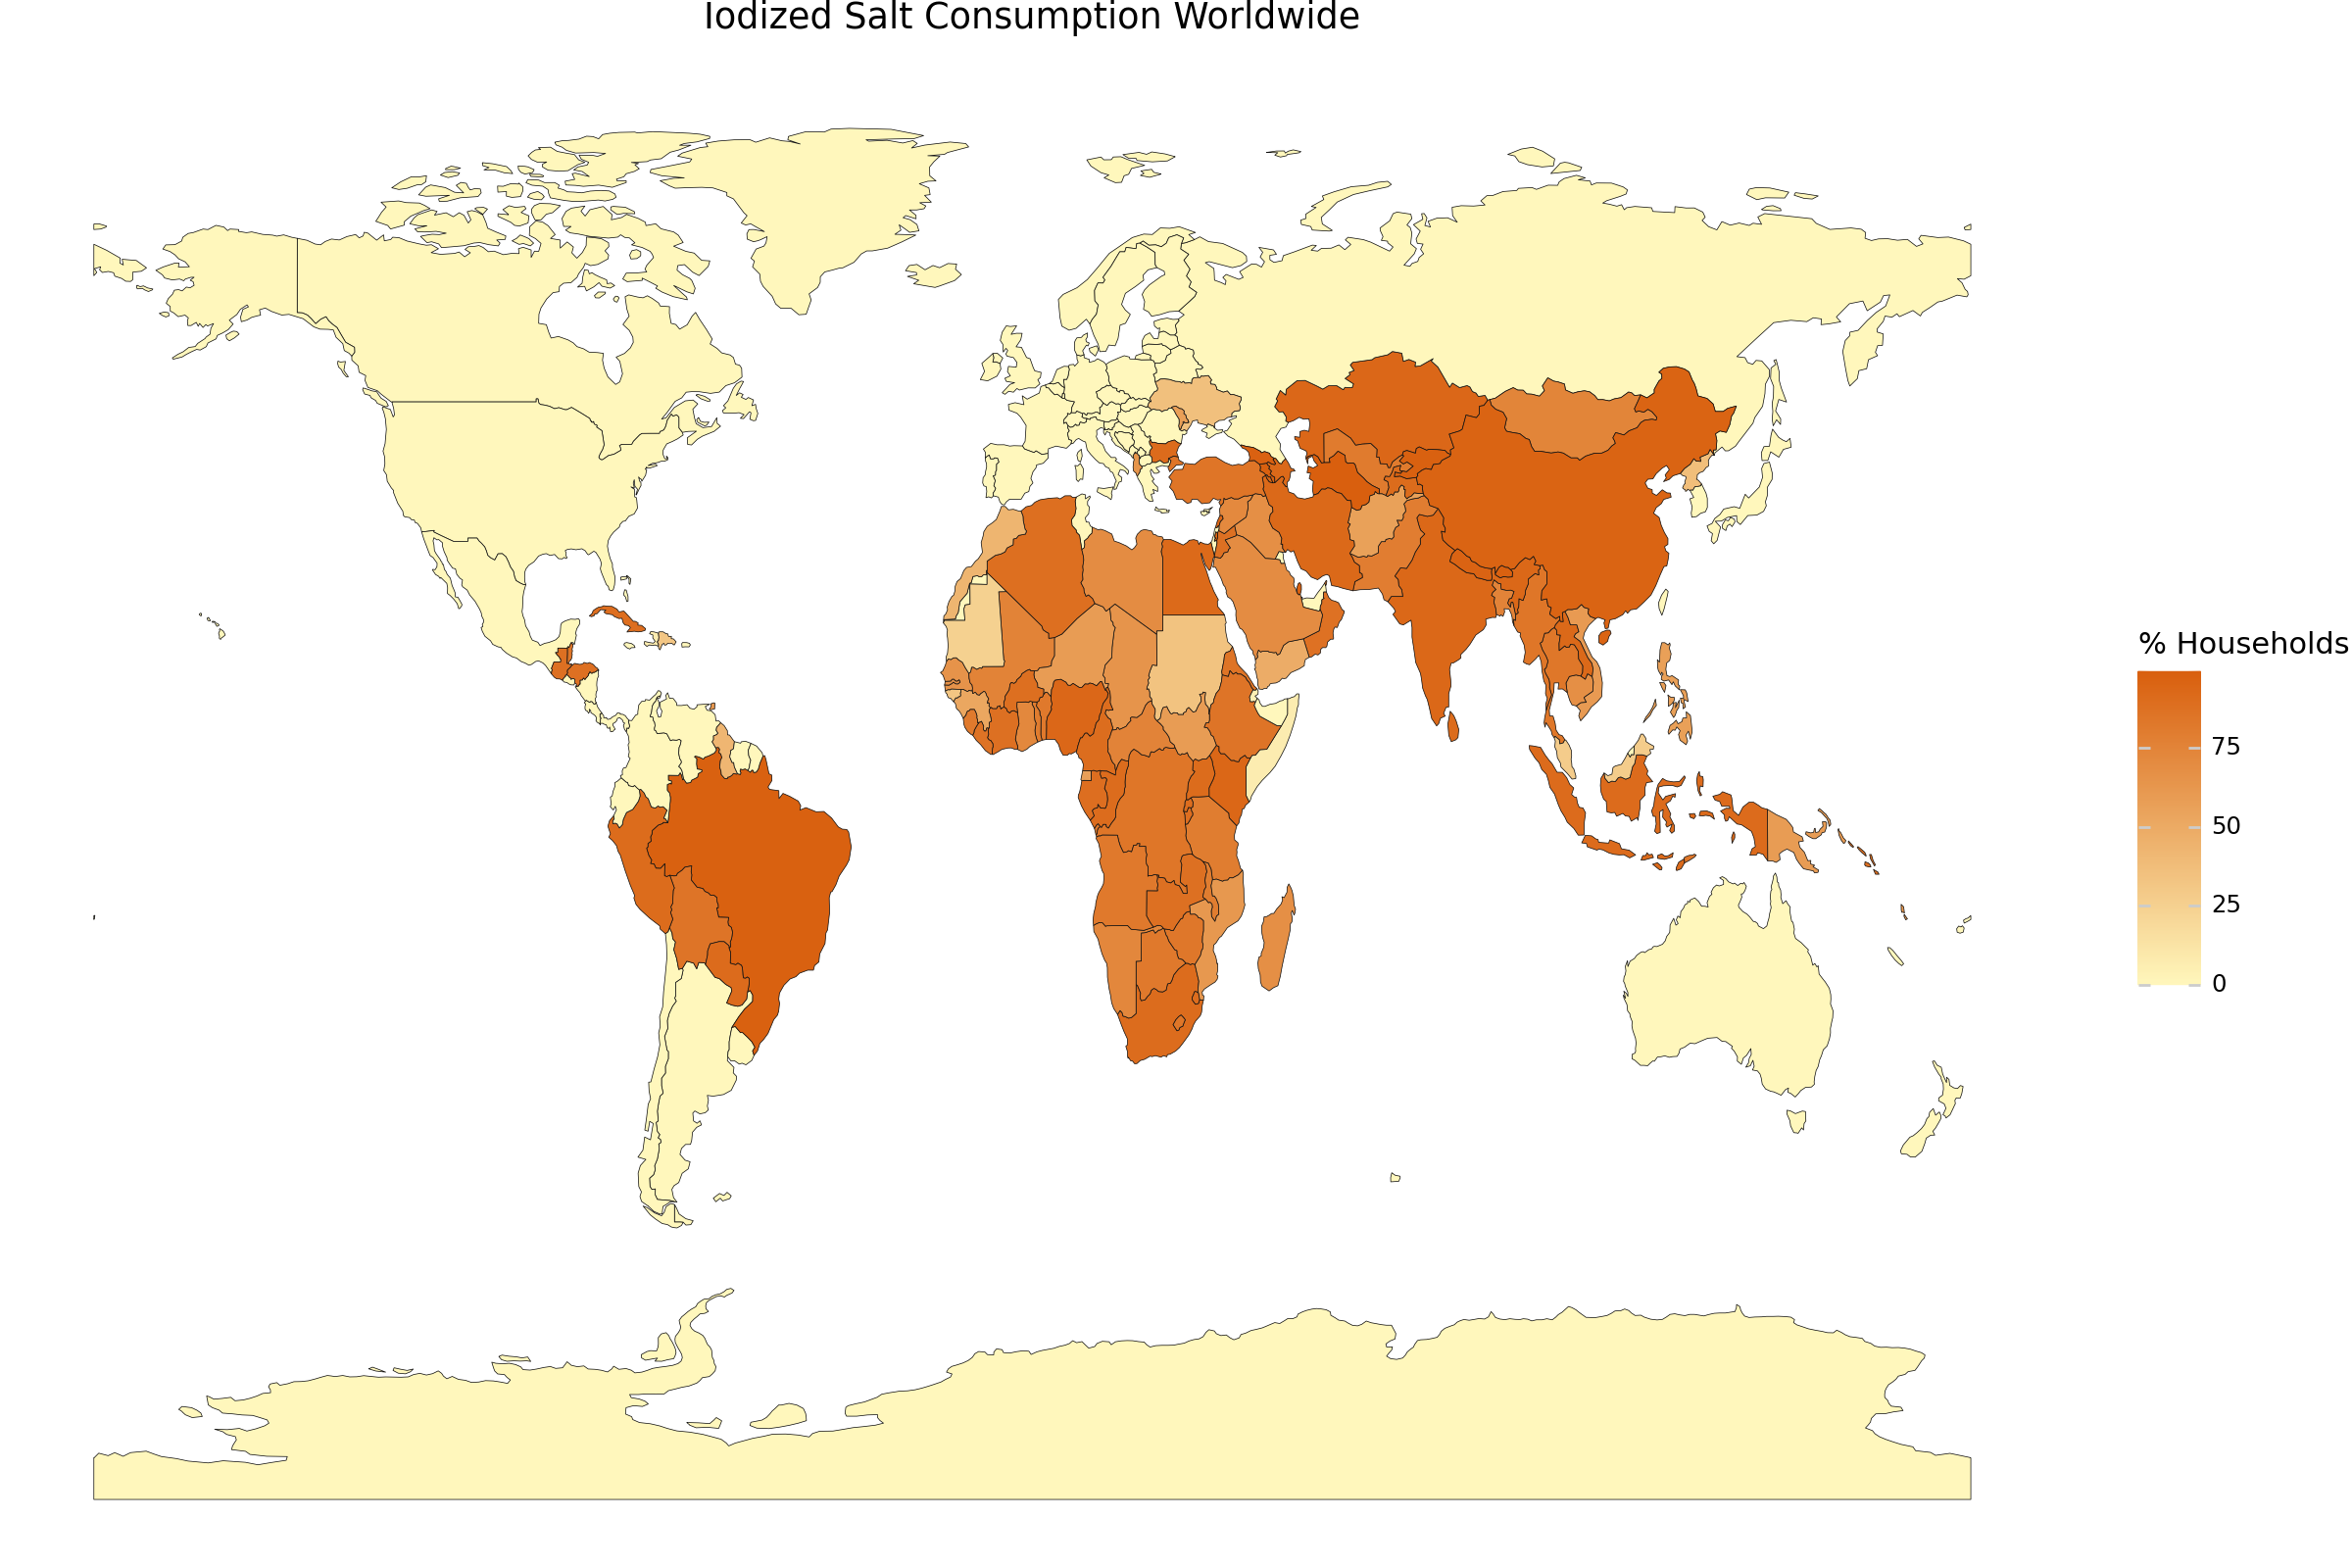

In [8]:
import geopandas as gpd
from plotnine import *

# Get world map from Natural Earth (updated URL)
world_url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(world_url)

# Prepare your data (assuming df is loaded)
# First ensure we have clean country codes
df_clean = df.dropna(subset=['alpha_3_code'])

# Get latest value per country
latest = (df_clean.sort_values('time_period')
          .groupby('alpha_3_code')
          .last()['obs_value']
          .reset_index())

# Merge with world map
merged = world.merge(latest,
                    left_on='ISO_A3',  # Correct column name in Natural Earth
                    right_on='alpha_3_code',
                    how='left')

# Fill missing values
merged['obs_value'] = merged['obs_value'].fillna(0)

# Create the map
world_map = (ggplot(merged)
 + geom_map(aes(fill='obs_value'), size=0.15)
 + scale_fill_gradient(name="% Households",
                      low="#fff7bc",
                      high="#d95f0e",
                      na_value="grey")
 + labs(title="Iodized Salt Consumption Worldwide")
 + theme_void()
 + theme(figure_size=(12, 8),
        legend_position='right')
)

world_map



Some countries have become true champions in the fight against iodine deficiency. This chart highlights the top 10 countries where nearly every household uses iodized salt. Their success shows what’s possible when governments, communities, and the salt industry work together to protect children’s health




  
  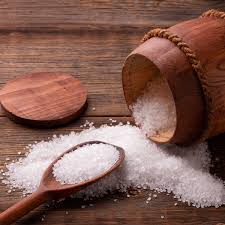

  ---

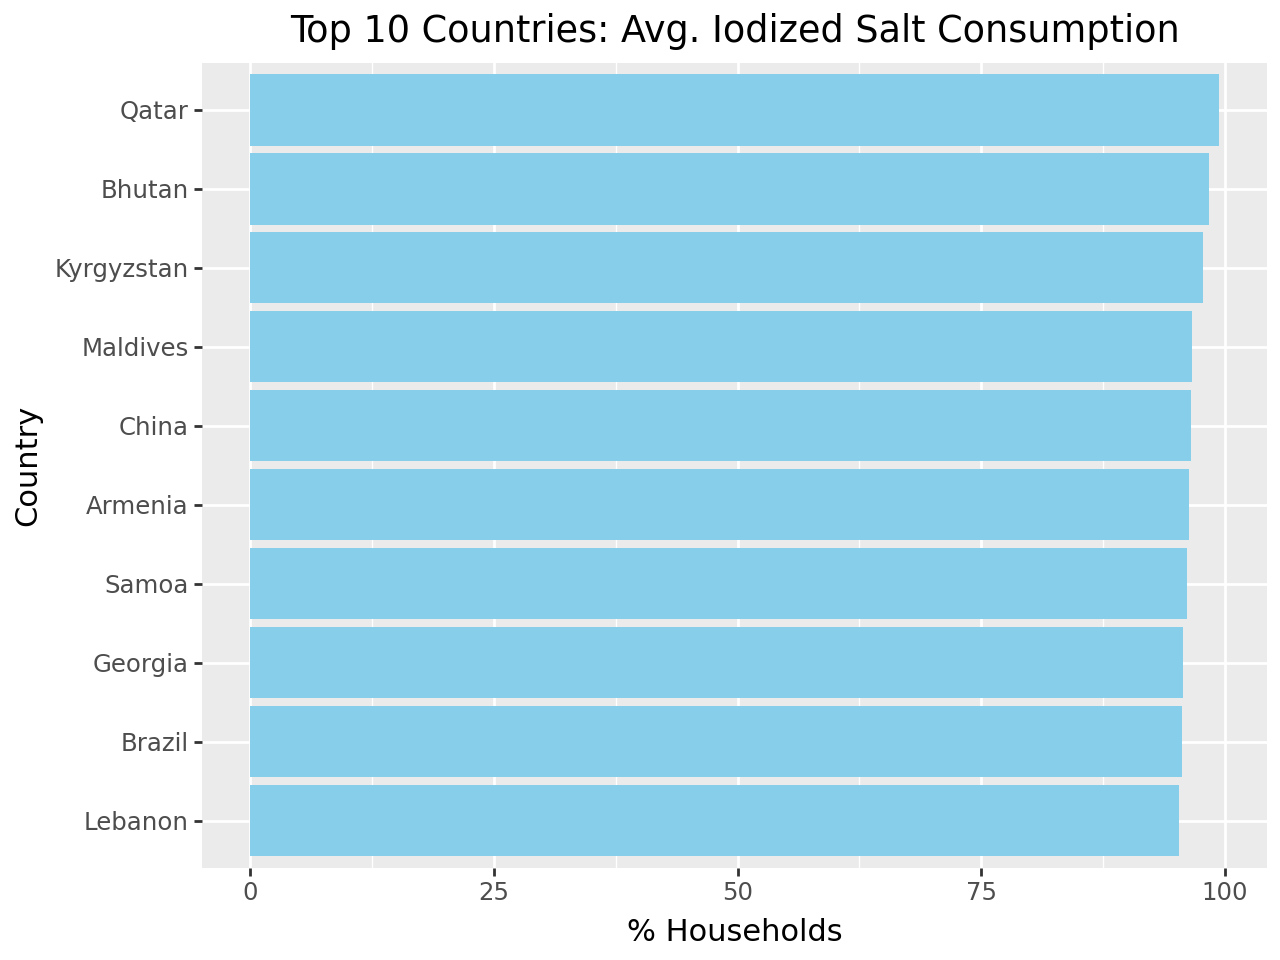

In [9]:
top10 = df.groupby('country')['obs_value'].mean().nlargest(10).reset_index()

(ggplot(top10, aes(x='reorder(country, obs_value)', y='obs_value'))
 + geom_col(fill='skyblue')
 + coord_flip()
 + labs(title='Top 10 Countries: Avg. Iodized Salt Consumption', x='Country', y='% Households')
)


Over the past two decades, the world has seen a steady increase in the percentage of households using iodized salt. This trend line shows that global efforts are working-but also reminds us that progress is not always smooth or equal across all countries. Continued commitment is needed to reach the last mile and prevent new cases of iodine deficiency


---



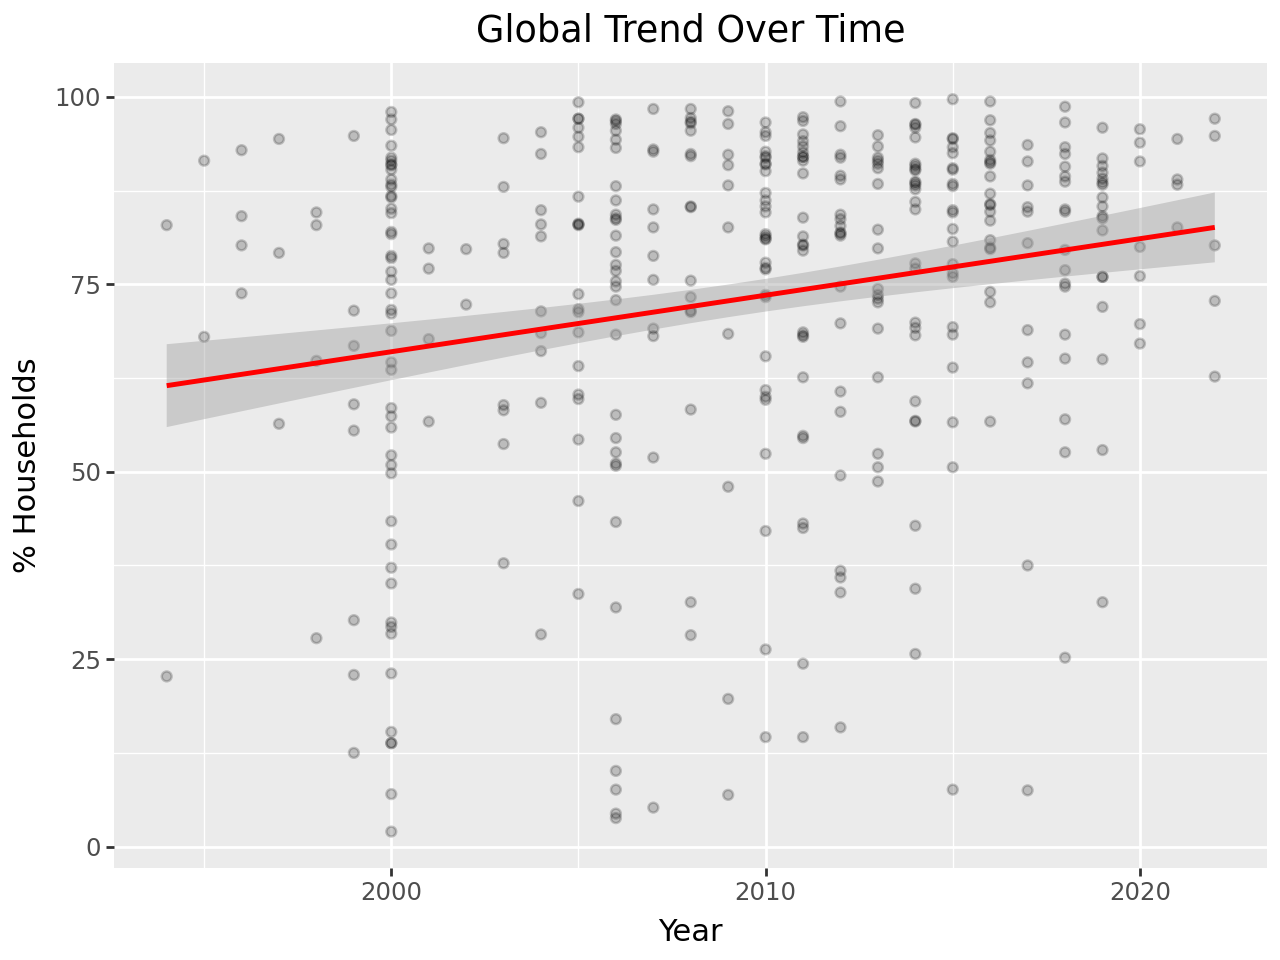

In [10]:
(ggplot(df, aes(x='year', y='obs_value'))
 + geom_point(alpha=0.2)
 + stat_smooth(method='lm', color='red')
 + labs(title='Global Trend Over Time', x='Year', y='% Households')
)


Ethiopia’s journey is an inspiring example of rapid improvement. In 2000, only about 28% of Ethiopian households used iodized salt. Today, that number has soared above 85%  result of strong public health campaigns and policy changes. Yet, the data also show that progress can stall or even reverse in some years, reminding us that ongoing monitoring and support are essential![sustainability.webp]

---



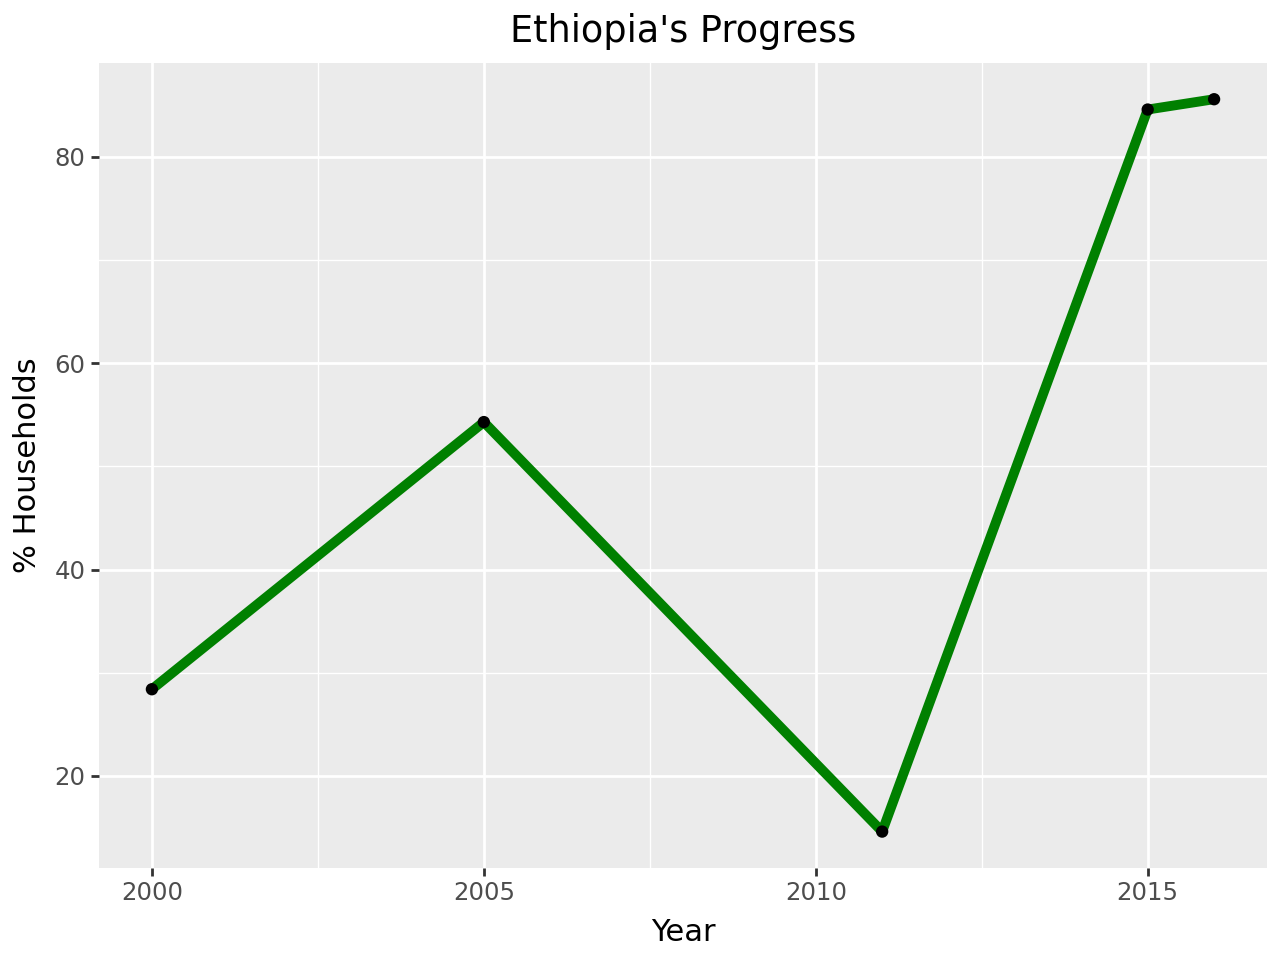

In [11]:
ethiopia = df[df['country'] == 'Ethiopia']

(ggplot(ethiopia, aes(x='year', y='obs_value'))
 + geom_line(color='green', size=2)
 + geom_point()
 + labs(title="Ethiopia's Progress", x='Year', y='% Households')
)


The story of salt iodization is one of science, partnership, and hope. With just a few cents per person per year, we can prevent the world’s most common cause of preventable brain damage. Let’s finish the job-so every child, everywhere, can reach their full potential